# Lucas Santana da Silva - 211028097
## PROBLEMA 2

Vamos resolver a equação do calor utilizando o método das diferenças finitas. O problema é definido pela equação diferencial:

$$
\frac{\partial T(x, t)}{\partial t} = \frac{\partial^2 T(x, t)}{\partial x^2}, \quad t > 0, \; 0 < x < 1
$$

Com as seguintes condições de contorno e iniciais:

$$
T(0, t) = 1, \quad T(1, t) = 0, \quad t \geq 0
$$
$$
T(x, 0) = 0, \quad 0 < x < 1
$$

O objetivo é comparar a solução numérica obtida com o método das diferenças finitas com a solução analítica dada por:

$$
T(x, t) = 1 - x - \sum_{n=1}^{\infty} \frac{2}{n \pi} \sin(n \pi x) \exp(-n^2 \pi^2 t)
$$


## Funções:

### Importação de Bibliotecas e Definição dos Parâmetros

Primeiramente, importamos as bibliotecas necessárias e definimos os parâmetros da simulação, incluindo o número de intervalos espaciais, o número total de passos no tempo, o comprimento da barra, e os tamanhos dos passos espacial e temporal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parâmetros
intervalos_espaciais = 50  # Número de intervalos espaciais
passos_tempo = 1000  # Número total de passos no tempo
comprimento_barra = 1.0  # Comprimento da barra
passo_espacial = comprimento_barra / intervalos_espaciais  # Tamanho do passo espacial (Δx)
passo_temporal = 0.2 * passo_espacial ** 2  # Tamanho do passo temporal (Δt)

### Inicialização dos parâmetros

In [2]:
# Função para inicialização dos parâmetros
def inicializa_parametros(N, k_final, L, delta_x, delta_t):
    x = np.linspace(0.0, L, N + 1)
    t = np.arange(0, k_final * delta_t, delta_t)
    Temp_inicial = np.zeros(N + 1)
    Temp_inicial[0] = 1
    Temp_inicial[-1] = 0
    Temp_all = np.zeros((len(t), N + 1))
    Temp_all[0, :] = Temp_inicial
    return x, t, Temp_inicial, Temp_all

# Inicializando os parâmetros
x, t, Temp_inicial, Temp_all = inicializa_parametros(intervalos_espaciais, passos_tempo, comprimento_barra, passo_espacial, passo_temporal)

### Cálculo da solução numérica
$$
T_i^{n+1} = T_i^n + \alpha \frac{\Delta t}{(\Delta x)^2} \left( T_{i+1}^n - 2T_i^n + T_{i-1}^n \right).
$$

In [3]:
# Função para cálculo da solução numérica
def calcula_temperatura(N, k_final, delta_x, delta_t, Temp, Temp_all):
    k = 1
    while k < len(Temp_all):
        Temp[1:-1] += (delta_t / (delta_x ** 2)) * (Temp[2:] - 2 * Temp[1:-1] + Temp[:-2])
        Temp_all[k, :] = Temp
        k += 1
    return Temp_all

# Calculando a solução numérica
Temp_all = calcula_temperatura(intervalos_espaciais, passos_tempo, passo_espacial, passo_temporal, Temp_inicial, Temp_all)

### Cálculo da solução analítica

A função `solucao_analitica` calcula a solução analítica da equação do calor para um dado vetor x e instante de tempo t, utilizando uma série de termos da solução exata.

In [4]:
def solucao_analitica(x, t, num_termos=10):
    n = np.arange(1, num_termos + 1)
    coef = 2 / (n * np.pi)
    termos_seno = np.sin(np.outer(n * np.pi, x))
    termos_exp = np.exp(-np.outer(n ** 2 * np.pi ** 2, t))
    Temp_exata = 1 - x - np.sum(coef[:, np.newaxis] * termos_seno * termos_exp, axis=0)
    return Temp_exata

# Calculando a solução analítica
Temp_exata_all = np.zeros((len(t), intervalos_espaciais + 1))
for k in range(len(t)):
    Temp_exata_all[k, :] = solucao_analitica(x, t[k])

### Plotagem 3D

O gráfico 3D mostra a distribuição da temperatura ao longo do tempo. A superfície representa a temperatura calculada numericamente.


In [5]:
def plotar_3d(x, t, Temp_all, salvar_figuras=False):
    X, T = np.meshgrid(x, t)
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, T, Temp_all, cmap='plasma', alpha=0.8)
    
    # Adiciona a barra de cores
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
    cbar.set_label('Temperatura', rotation=270, labelpad=15)
    
    ax.set_xlabel('x')
    ax.set_ylabel('Tempo')
    ax.set_zlabel('Temperatura')
    ax.set_title('Distribuição da Temperatura ao Longo do Tempo - Problema 2', fontsize=16, fontweight='bold')
    
    if salvar_figuras:
        plt.savefig('Graficos_Gerados/distribuicao_temperatura_3d_problema_2.png', format='png', dpi=1200, bbox_inches='tight')
    plt.show()

### Plotagem 2D

O gráfico 2D compara a temperatura numérica e a analítica em vários instantes de tempo. A legenda foi posicionada no canto superior direito para evitar sobreposição com os gráficos.


In [6]:
def plotar_2d(x, t, Temp_all, Temp_exata_all, salvar_figuras=False):
    plt.figure(figsize=(12, 8))
    
    passo = len(t) // 10
    for k in range(0, len(t), passo):
        plt.plot(x, Temp_all[k, :], label=f'Numérica t = {t[k]:.2f}', linestyle='-', color='red', linewidth=2)
        plt.plot(x, Temp_exata_all[k, :], '--', label=f'Analítica t = {t[k]:.2f}', color='blue', linewidth=2)
    
    plt.xlabel('x', fontsize=14)
    plt.ylabel('Temperatura', fontsize=14)
    plt.title('Comparação entre Temperatura Numérica e Analítica - Problema 2', fontsize=16, fontweight='bold')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    
    if salvar_figuras:
        plt.savefig('Graficos_Gerados/comparacao_temperatura_2d_problema_2.png', format='png', dpi=1200, bbox_inches='tight')
    plt.show()
    
def plotar_erro(Temp_all, Temp_exata_all, x, salvar_figuras=False):
    erro = np.abs(Temp_all - Temp_exata_all)
    
    plt.figure(figsize=(12, 8))
    plt.plot(x, erro[0, :], label='Erro inicial', color='red')
    plt.xlabel('x', fontsize=14)
    plt.ylabel('Erro', fontsize=14)
    plt.title('Erro entre a Solução Numérica e Analítica - Problema 2', fontsize=16, fontweight='bold')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    
    if salvar_figuras:
        plt.savefig('Graficos_Gerados/erro_comparacao_problema_2.png', format='png', dpi=1200, bbox_inches='tight')
    
    plt.show()

### Plotar Erro

A análise do erro entre a solução numérica e analítica pode ajudar a entender a precisão da solução numérica.


In [7]:
def plotar_erro(Temp_all, Temp_exata_all, x, salvar_figuras=False):
    # Calcula o erro absoluto
    erro = np.abs(Temp_all - Temp_exata_all)
    
    # Plotagem do erro
    plt.figure(figsize=(12, 8))
    plt.plot(x, erro[0, :], label='Erro inicial', color='red')
    plt.xlabel('x', fontsize=14)
    plt.ylabel('Erro', fontsize=14)
    plt.title('Erro entre a Solução Numérica e Analítica - Problema 2', fontsize=16, fontweight='bold')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    
    if salvar_figuras:
        plt.savefig('Graficos_Gerados/erro_comparacao_problema_2.png', format='png', dpi=1200, bbox_inches='tight')
    
    plt.show()

# Resultado

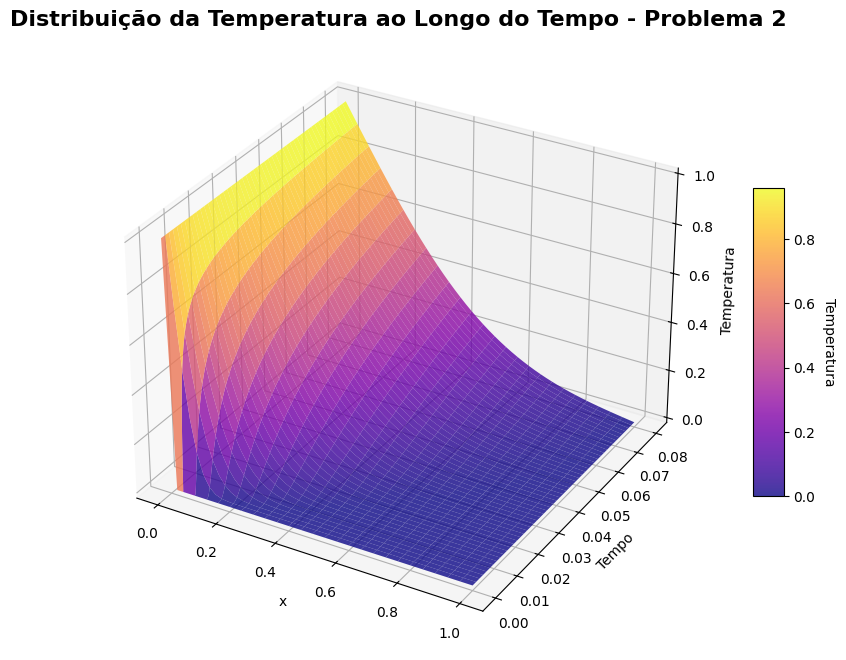

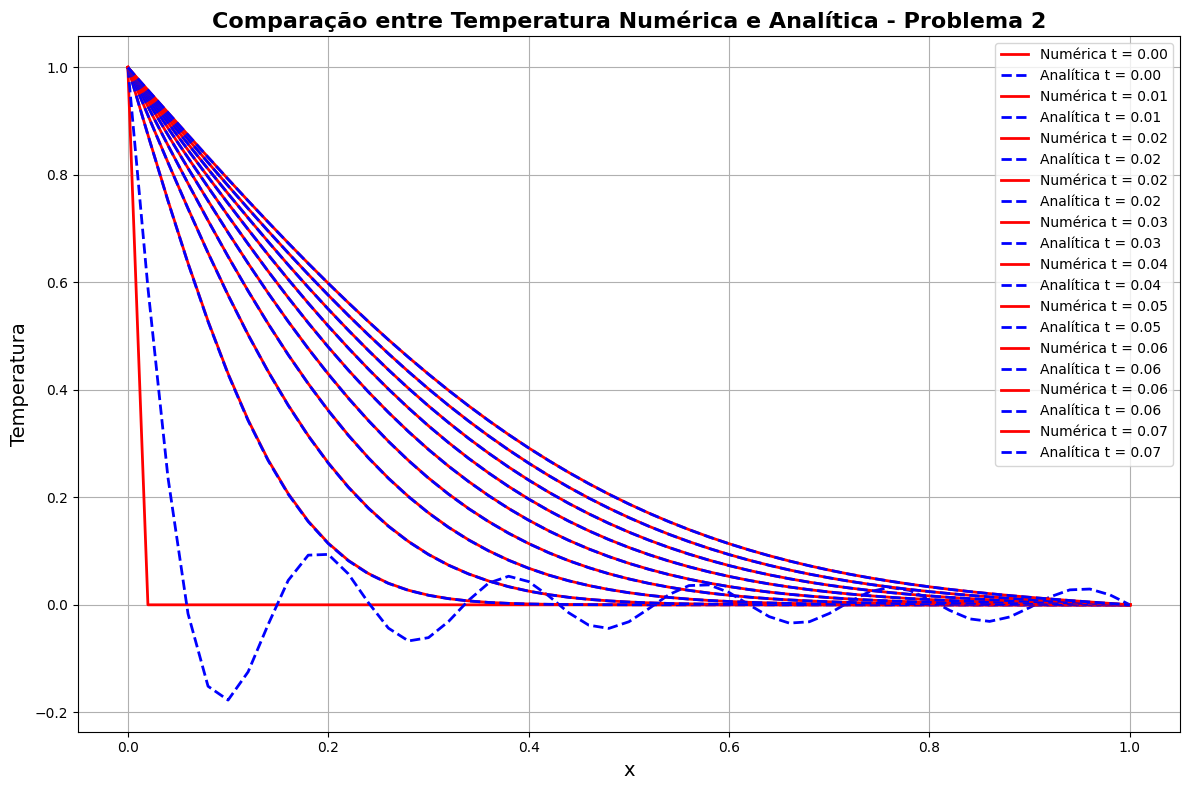

In [8]:
# Plotando a distribuição da temperatura em 3D
plotar_3d(x, t, Temp_all, salvar_figuras=True)

# Comparando a temperatura numérica com a analítica em 2D
plotar_2d(x, t, Temp_all, Temp_exata_all, salvar_figuras=True)

### Análise do Erro

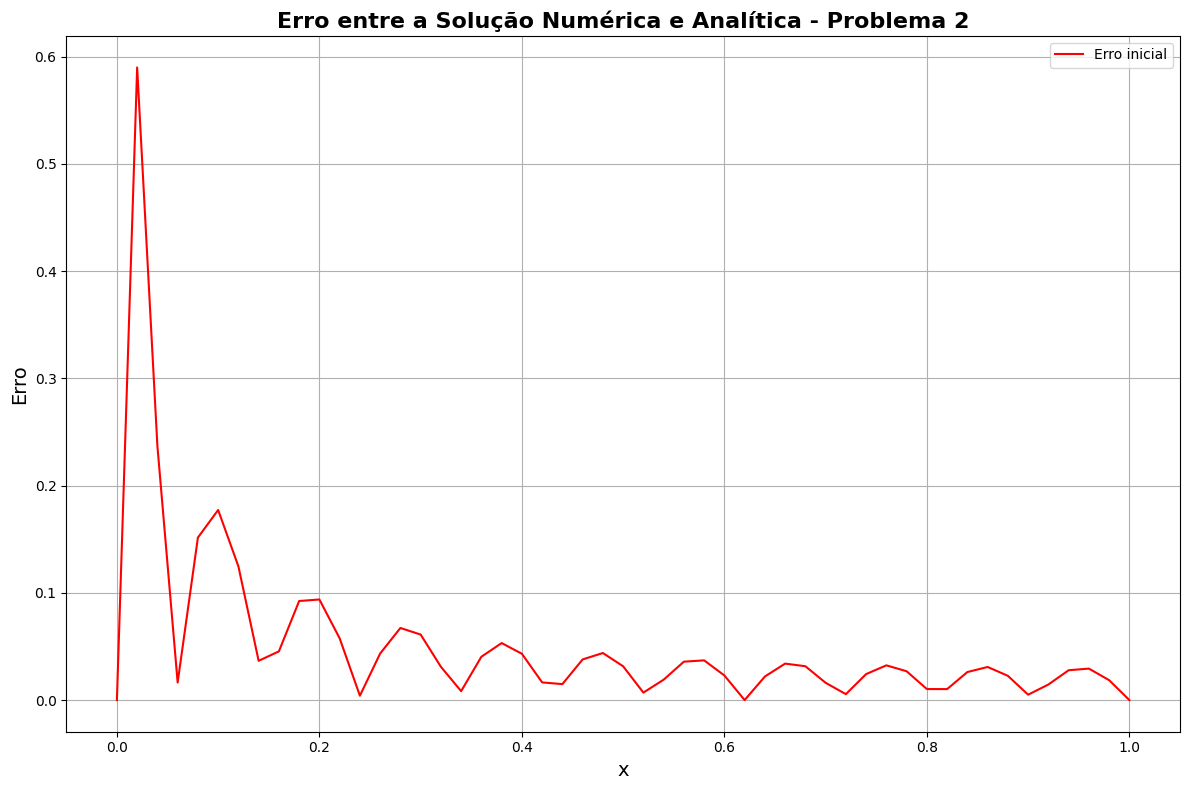

In [9]:
# Plotando o erro
plotar_erro(Temp_all, Temp_exata_all, x, salvar_figuras=False)

### Comportamento do Perfil de Temperatura quando  $ t \to \infty $

Quando $ t \to \infty $ na equação do calor com as condições de contorno e iniciais fornecidas, o perfil de temperatura evolui da seguinte forma:

1. **Condições Iniciais e de Contorno:**
   - **Condições de contorno:** $ T(0, t) = 1 $ e $ T(1, t) = 0 $.
   - **Condição inicial:** $ T(x, 0) = 0 $ para $ 0 < x < 1 $.

2. **Solução Analítica:**
   A solução analítica da equação do calor é dada por:
   $$
   T(x, t) = 1 - x - \sum_{n=1}^{\infty} \frac{2}{n \pi} \sin(n \pi x) \exp(-n^2 \pi^2 t)
   $$

3. **Efeito da Expansão Temporal:**
   - Cada termo na série:
     $$
     \frac{2}{n \pi} \sin(n \pi x) \exp(-n^2 \pi^2 t)
     $$
     possui um fator exponencial $ \exp(-n^2 \pi^2 t) $ que diminui rapidamente conforme $ t $ aumenta.
   - Com o aumento do tempo, $ \exp(-n^2 \pi^2 t) $ tende a zero para todos os $ n \geq 1 $, fazendo com que os termos da série se tornem cada vez menores.

4. **Perfil de Temperatura Final:**
   - Quando $ t \to \infty $, todos os termos da série na solução analítica tendem a zero.
   - Portanto, a solução $ T(x, t) $ se aproxima de:
     $ T(x, t) \approx 1 - x $
   - Isso reflete a condição de contorno $ T(0, t) = 1 $ e $ T(1, t) = 0 $, que são constantes e não dependem do tempo.

**Resumo**: 

- **A longo prazo**, o perfil de temperatura converge para uma distribuição linear ao longo da barra:
  $$
  T(x) = 1 - x
  $$
- **Em resumo**, a solução final reflete o perfil linear imposto pelas condições de contorno, com a influência dos termos oscilatórios se dissipando com o tempo.


### Dependência da Solução com o Tamanho de $\Delta$x e $\Delta$t

1. **Conceito de Estabilidade e Convergência:**
   - A solução numérica da equação do calor depende fortemente dos tamanhos dos passos espaciais ($\Delta$x) e temporais ($\Delta$t).
   - A escolha adequada desses parâmetros é crucial para garantir a estabilidade e a precisão da solução numérica.

2. **Passo Espacial ($\Delta$x):**
   - O passo espacial $\Delta$x determina a resolução espacial da malha. Quanto menor o $\Delta$x, maior é a resolução e mais precisa é a representação da solução.
   - No entanto, um $\Delta$x menor também requer um maior número de pontos na malha, o que aumenta o custo computacional.

3. **Passo Temporal ($\Delta$t):**
   - O passo temporal $\Delta$t influencia a precisão da solução em relação ao tempo. Um Δt menor melhora a precisão temporal, mas também aumenta o número de passos temporais, afetando o tempo de execução.
   - A escolha de $\Delta$t deve atender à condição de estabilidade numérica, que para o método explícito das diferenças finitas é dada por:
     $$
     \text{Número de Fourier} = \frac{\Delta t}{\Delta x^2} \leq \frac{1}{2}
     $$
   - Se o número de Fourier exceder 0.5, o método pode se tornar instável e produzir resultados imprecisos.

4. **Compromisso entre Precisão e Custo Computacional:**
   - Há um trade-off entre a precisão da solução e o custo computacional. Reduzir Δx e Δt aumenta a precisão, mas também requer mais cálculos e memória.
   - A escolha ideal dos passos espaciais e temporais deve equilibrar a precisão desejada com o custo computacional disponível.

5. **Impacto na Solução Numérica:**
   - **Para $\Delta$x muito grande:** A solução pode ser imprecisa e não capturar detalhes importantes do perfil de temperatura.
   - **Para $\Delta$x muito pequeno:** A solução será mais precisa, mas o custo computacional aumentará.
   - **Para $\Delta$t muito grande:** Pode ocorrer perda de precisão e instabilidade numérica.
   - **Para $\Delta$t muito pequeno:** A precisão aumentará, mas o tempo de computação também crescerá.

6. **Influência do Parâmetro $\alpha$**
   - **O parâmetro $\alpha$ é o coeficiente de difusão térmica e é dado por:
    $$
    \alpha = \frac{k}{\rho c_p}
    $$
       onde $k$ é a condutividade térmica, $\rho$ é a densidade e $c_p$ é a capacidade calorífica específica.**
    - **O efeito de $\alpha$ é a Velocidade de Difusão:** O valor de $\alpha$ determina a rapidez com que o calor se difunde ao longo da barra. Um $\alpha$ maior resulta em uma maior taxa de difusão, fazendo com que o calor se espalhe mais rapidamente.

**Resumo**: 

- **A precisão da solução** depende fortemente da escolha dos passos espaciais e temporais. Um equilíbrio adequado deve ser encontrado para garantir a estabilidade e a precisão da simulação.
- **A condição de estabilidade** do método das diferenças finitas deve ser respeitada para evitar soluções instáveis e imprecisas.

### Condição de Estabilidade


Faça testes de condição de estabilidade: modifique os parâmetros deltax e deltat no código abaixo:

Para Δx = 0.05 e Δt = 0.002, a condição de estabilidade não é obedecida.


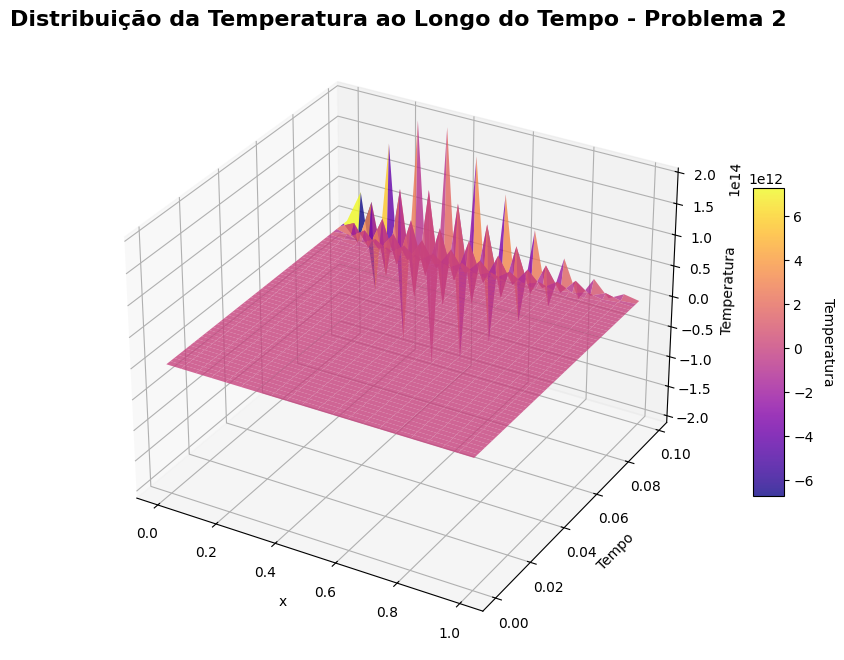

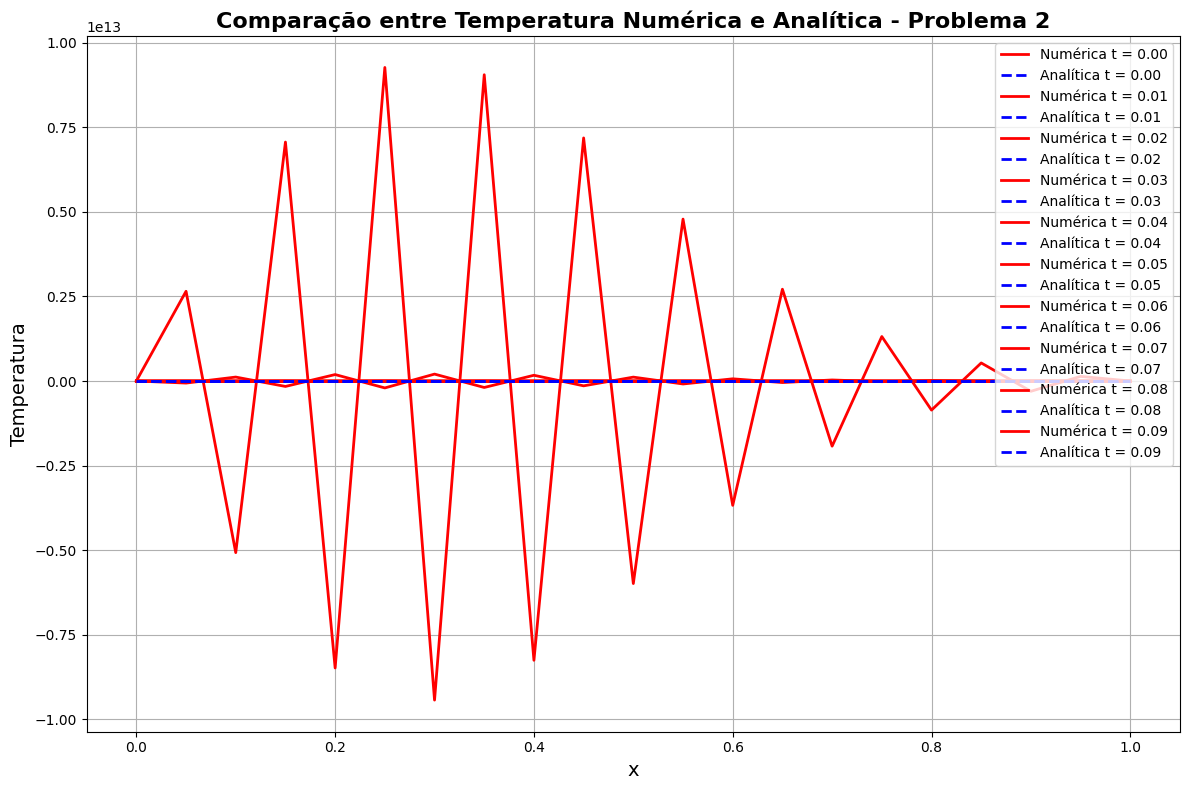

In [10]:
# Definindo parâmetros que violam a condição de estabilidade
comprimento_barra = 1.0
passos_tempo = 50
passo_espacial = 0.05  # Escolha Δx pequeno para tornar Δt/Δx² grande
passo_temporal = 0.002  # Escolha Δt grande o suficiente para violar a condição de estabilidade

intervalos_espaciais = int(comprimento_barra / passo_espacial)

# Verificação da condição de estabilidade
if passo_temporal / (passo_espacial ** 2) > 0.5:
    print(f"Para Δx = {passo_espacial} e Δt = {passo_temporal}, a condição de estabilidade não é obedecida.")
else:
    print(f"Para Δx = {passo_espacial} e Δt = {passo_temporal}, a condição de estabilidade é obedecida.")

# Inicializando os parâmetros
x, t, Temp_inicial, Temp_all = inicializa_parametros(intervalos_espaciais, passos_tempo, comprimento_barra, passo_espacial, passo_temporal)

# Calculando a solução numérica
Temp_all = calcula_temperatura(intervalos_espaciais, passos_tempo, passo_espacial, passo_temporal, Temp_inicial, Temp_all)

# Calculando a solução analítica
Temp_exata_all = np.zeros((len(t), intervalos_espaciais + 1))
for k in range(len(t)):
    Temp_exata_all[k, :] = solucao_analitica(x, t[k])

# Plotando resultados
plotar_3d(x, t, Temp_all, salvar_figuras=False)
plotar_2d(x, t, Temp_all, Temp_exata_all, salvar_figuras=False)